DEPENDENCIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##---------LOADING DATA

In [4]:
#-----------Load Data
stock_name = "AAPL"
data = yf.download( stock_name , start='2020-12-01' , end = '2025-02-28')
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-12-01,119.870560,120.603145,117.223484,118.200265,127728200
2020-12-02,120.222198,120.505466,118.083046,119.186806,89004200
2020-12-03,120.085472,120.905965,119.372419,120.651999,78967600
2020-12-04,119.411484,120.007321,118.698430,119.753356,78260400
2020-12-07,120.876663,121.677623,119.411492,119.470096,86712000
...,...,...,...,...,...
2025-02-21,245.550003,248.690002,245.220001,245.949997,53197400
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400


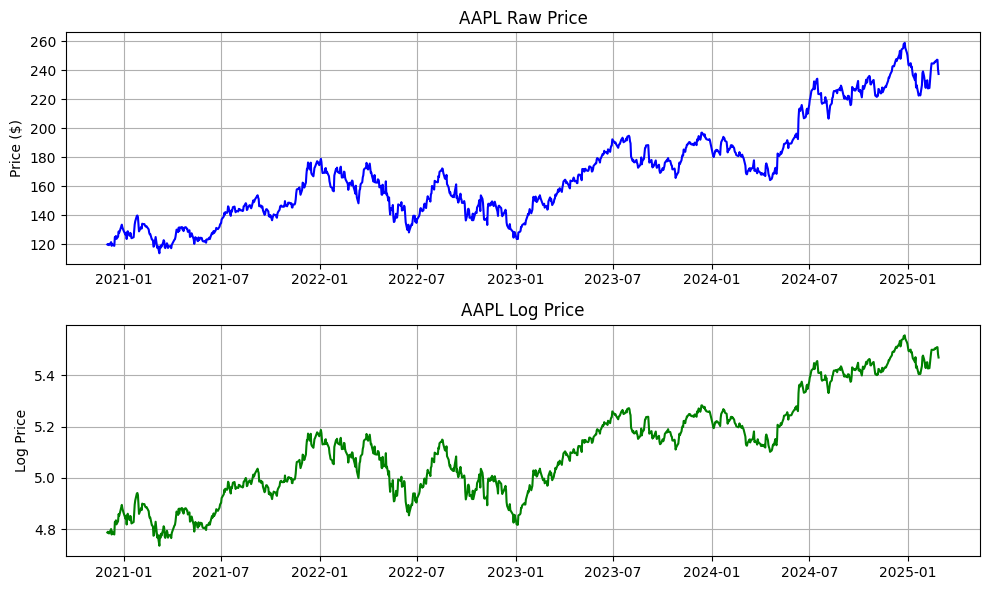

In [5]:
data[['Close']].dropna()
data['log_price'] = np.log(data['Close'])

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], color='blue')
plt.title('AAPL Raw Price')
plt.ylabel('Price ($)')
plt.grid(True)

# Log price
plt.subplot(2, 1, 2)
plt.plot(data.index, data['log_price'], color='green')
plt.title('AAPL Log Price')
plt.ylabel('Log Price')
plt.grid(True)

plt.tight_layout()
plt.show()

##--------DATA PREPROCESSING

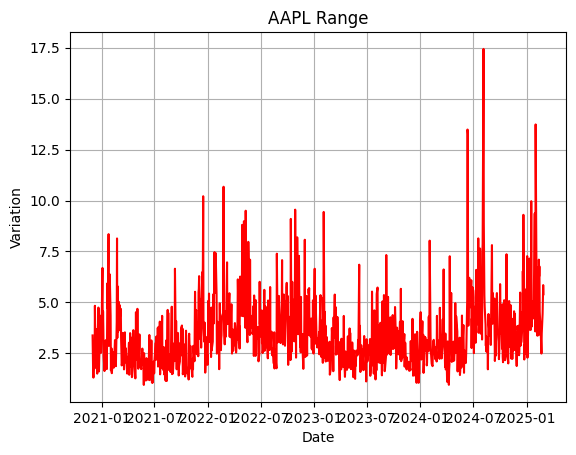

In [6]:
data['Range'] = data['High'] - data['Low']
#-----Range
plt.plot(data.index, data['Range'], color='red')
plt.title('AAPL Range')
plt.xlabel('Date')
plt.ylabel('Variation')
plt.grid(True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1065 entries, 2020-12-01 to 2025-02-27
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1065 non-null   float64
 1   (High, AAPL)    1065 non-null   float64
 2   (Low, AAPL)     1065 non-null   float64
 3   (Open, AAPL)    1065 non-null   float64
 4   (Volume, AAPL)  1065 non-null   int64  
 5   (log_price, )   1065 non-null   float64
 6   (Range, )       1065 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 66.6 KB


In [8]:
scale = StandardScaler()
data['Volume_Scaled'] = scale.fit_transform(data[['Volume']])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1065 entries, 2020-12-01 to 2025-02-27
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, AAPL)      1065 non-null   float64
 1   (High, AAPL)       1065 non-null   float64
 2   (Low, AAPL)        1065 non-null   float64
 3   (Open, AAPL)       1065 non-null   float64
 4   (Volume, AAPL)     1065 non-null   int64  
 5   (log_price, )      1065 non-null   float64
 6   (Range, )          1065 non-null   float64
 7   (Volume_Scaled, )  1065 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 74.9 KB


In [11]:
data = data.drop(['Open' , 'High' , 'Low' , 'Volume'] , axis = 1)

KeyError: 'Open'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1065 entries, 2020-12-01 to 2025-02-27
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, AAPL)      1065 non-null   float64
 1   (log_price, )      1065 non-null   float64
 2   (Range, )          1065 non-null   float64
 3   (Volume_Scaled, )  1065 non-null   float64
dtypes: float64(4)
memory usage: 41.6 KB


In [18]:
null_counter = data.isnull().sum()
print(null_counter)

Price          Ticker
Close          AAPL      0
log_price                0
Range                    0
Volume_Scaled            0
dtype: int64
False


np.int64(0)

In [20]:
data.to_csv("stock_data.csv")

##_______++++FEATURE ENGINEERING

##-------- Locally Linear regression